In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("tutorial1_2.ipynb")

# Tutorial 1.2: 2016 Miami Presidential Primary Debates

Welcome to Tutorial 2!  In today's class we covered four python built-in-data types, `lists`, `tuples`, `sets`, and `dictionaries`. We saw how we can use `sets` to keep track of vocabularies and `dictionaries` to keep track of word counts. 

In this tutorial, we will create dictionaries to keep track of each candidates' vocabulary and the frequency of the terms they use.

First, set up the tests and imports by running the cell below.

In [1]:
# Run this cell, but please don't change it.

# These lines load the tests.
import otter
grader = otter.Notebook()

import io
import pandas as pd
import matplotlib as plt

## Outline


## 1. Reading files

We will be working with the same files as we did in today's lecture: `Republican_16_Miami_Debate.txt` and `Democratic_16_Miami_Debate.txt`

In today's lecture, we used the following lines to read in the files:

In [2]:
repub_debates = open("data/Republican_16_Miami_Debate.txt", mode='r').read()
dem_debates = open("data/Democratic_16_Miami_Debate.txt", mode='r').read()

Let's look more closely at what happens when opening a file using the `open()` function

In [3]:
repub_file = open("data/Republican_16_Miami_Debate.txt", mode='r')
repub_file

<_io.TextIOWrapper name='data/Republican_16_Miami_Debate.txt' mode='r' encoding='UTF-8'>

This creates an io.TextIOWrapper object. We have stored the object in the variable named `repub_file`. Today we used `.read()` to extract the contents from the file.

<!--
BEGIN QUESTION
name: q1_1
points: 1
-->

**Question 1.1:** What type is returned by the `.read()` function? Assign the answer to `read_return_type`

In [7]:
read_return_type = type(repub_file.read())
read_return_type

str

In [8]:
grader.check("q1_1")

q1_1 passed!

If we run the following line, we can see a list of functions and methods that belong to the TextIOWrapper object which we named `repub_file`.

In [6]:
print(dir(repub_file))

['_CHUNK_SIZE', '__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '_checkClosed', '_checkReadable', '_checkSeekable', '_checkWritable', '_finalizing', 'buffer', 'close', 'closed', 'detach', 'encoding', 'errors', 'fileno', 'flush', 'isatty', 'line_buffering', 'mode', 'name', 'newlines', 'read', 'readable', 'readline', 'readlines', 'reconfigure', 'seek', 'seekable', 'tell', 'truncate', 'writable', 'write', 'write_through', 'writelines']


<!--
BEGIN QUESTION
name: q1_2
points: 1
-->

**Question 1.2:** Which of the above do you think will tell us whether the object was opened for reading?

- a. "mode"
- b. "read()"
- c. "readable()"
- d. "tell()"

Assign the letter (a - d) as a string to the the name `method_to_check_open_for_reading`

*Hint:* Feel free to use the contextual help navigator or make a new python cell below to test these different methods and attributes

In [14]:
#You could also run the boolean of .closed() to see
method_to_check_open_for_reading = "a"

In [15]:
grader.check("q1_2")

q1_2 passed!

### 1.1 `readline()` vs `readlines()`
After opening a file, we want to read in the contents so that we can process and analyze text. The opened file object has two methods we can use, `readline()` and `readlines()`.

<!--
BEGIN QUESTION
name: q1_3
points: 1
-->

**Question 1.3:** What type is the value that `readline()` returns? Assign the type to the name `read_line_return_type`

*Hint:* Feel free to use the contextual help navigator or make a new python cell below to test `readline()`



In [17]:
read_line_return_type = type(repub_file.readline())
read_line_return_type

str

In [18]:
grader.check("q1_3")

q1_3 passed!

<!--
BEGIN QUESTION
name: q1_4
points: 1
-->

**Question 1.4:** What type does `readlines()` return? Assign the type to the name `read_lines_return_type`

In [19]:
read_lines_return_type = type(repub_file.readlines())
read_lines_return_type

list

In [20]:
grader.check("q1_4")

q1_4 passed!

<!--
BEGIN QUESTION
name: q1_5
points: 1
-->

**Question 1.5:** Why might it be beneficial to use `readlines()` and why might it be beneficial to use `readline()`? 

*Please write at most two sentences in the next markdown cell*

_Type your answer here, replacing this text._

# 2. Data Exploration & Parsing

For this tutorial we are going to use `readlines()`. 
Running the code cell below will store the transcripts of the debates into two variables: `repub_debates` and `dem_debates`.

In [29]:
repub_debates = open("data/Republican_16_Miami_Debate.txt", mode='r').readlines()
dem_debates = open("data/Democratic_16_Miami_Debate.txt", mode='r').readlines()

<!--
BEGIN QUESTION
name: q2_1
points: 1
-->

**QUESTION 2.1:** How many lines are in the transcripts of the republican and democratic debates?

Write expressions to compute these values and assign the returned values to the appropriate variables below

In [30]:
repub_debates_line_count = len(repub_debates)
dem_debates_line_count = len(dem_debates)

print(f"The republican debate transcript has {repub_debates_line_count} lines, \n\
and the democratic debate transcript has {dem_debates_line_count} lines")

The republican debate transcript has 1085 lines, 
and the democratic debate transcript has 929 lines


In [31]:
grader.check("q2_1")

q2_1 passed!

For today's analysis we will just look at candidate specific term frequencies rather than party specific term frequencies.

<!--
BEGIN QUESTION
name: q2_2
points: 1
-->

**Question 2.2:** In the code cell below, combine the debate transcripts into a new variable named `both_debates`

In [32]:
both_debates = repub_debates + dem_debates
len(both_debates)

2014

In [33]:
grader.check("q2_2")

q2_2 passed!

As a sanity check to make sure we combined these two lists correctly, it might be a good idea to check if the sum of number of lines in each list is equal to the number of lines in `both_debates` 

<!--
BEGIN QUESTION
name: q2_3
points: 1
-->

**QUESTION 2.3:** Compute the number of lines in `both_debates` and assign the value to the variable named `both_debates_line_count`

In [34]:
both_debates_line_count = len(both_debates)

print(f"The republican debate transcript has {repub_debates_line_count} lines, \n\
the democratic debate transcript has {dem_debates_line_count} lines \n\
combined they have {both_debates_line_count}")

The republican debate transcript has 1085 lines, 
the democratic debate transcript has 929 lines 
combined they have 2014


In [35]:
grader.check("q2_3")

q2_3 passed!

### 2.1 Looking at our data

When working with real world data, it is important to look at what our data actually looks like. This will help us parse and clean our text for analysis.

Run the next code cell to randomly sample 15 lines from the debates. Run this a few times and pay close attention to the end of each line.

In [36]:
import random

random.choices(both_debates, k=15)

['\n',
 'TRUMP: Thank you very much.\n',
 "But look, I was there when, and saw it, when the Egyptian ambassador to the United States was in the Rose Garden bringing the Arab Muslim world to work with us to repel Saddam Hussein from Kuwait. The fact is that if we're going to defeat ISIS, we're going to have to have these countries. And they are Egypt. And they are Saudi Arabia. And they are Jordan. And they are the Gulf states.\n",
 "SALINAS: We'reaking break.\n",
 '\n',
 '\n',
 '\n',
 '\n',
 "I would say we have to absolutely finish the wall and guard the border. And if anybody were to come in after that, they are going to have to go back. No excuses because we can't continue this problem. I think we ought to have a guest worker program, where people come in, work and go home.\n",
 'Now, the one silver lining of Obama abusing executive power is that everything done with executive power can be undone with executive power, and I intend to do that. [applause]\n',
 '\n',
 '\n',
 '\n',
 "SA

Each example ends with `\n`. This is a newline character, which is one of many "whitespace" characters.


#### White spaces

The following code cell will print out a list of whitespace characters

In [37]:
import string
string.whitespace

' \t\n\r\x0b\x0c'

The most common whitespaces we will deal with are:

|  marker | Explanation  | 
|---|---|
| " "  | Space |
| \t  | Tab  | 
| \n  | Newline  | 
| \r  | Carriage return (remove everything to the left) |

The next code cell provides examples of these whitespace characters. Run the cell and look at what is printed

In [38]:
print("Tab:\tHello\tWorld")
print("Newline:\nHello\nWorld")

print("Carriage Return:")
print("\rHello\rWorld")

Tab:	Hello	World
Newline:
Hello
World
Carriage Return:
World


#### Removing trailing whitespace

When opening and reading in text files, each line will often end with a `"\n"` character. This is an example of a *trailing* whitespace. *Leading* whitespaces are whitespaces that appear in the begining of a string. For many analyses, trailing and leading whitespaces are not useful, sometimes they are but here they are not helpful. 


Python `strings` have three relevant functions:

- `.strip()` - return a copy of the string with <i><ins>leading and trailing</ins></i> whitespace removed.
- `.lstrip()` - return a copy of the string with <i><ins>leading</ins></i> whitespace removed.
- `.rstrip()` - return a copy of the string with <i><ins>trailing</ins></i> whitespace removed.`

<!--
BEGIN QUESTION
name: q2_4
points: 1
-->

**Question 2.4:** Use one of the appropriate string functions to access the 5th line from the Republican debate and assign it to the variable `cleaned_repub_5_line`

In [40]:
cleaned_repub_5_line = repub_debates[4].rstrip()
cleaned_repub_5_line

"Florida and Ohio each have a large number of delegates at stake and they award all of them to the candidate who wins. They're a winner-take-all state. So that's the first time that will happen in this primary season and this is the last debate before that critical round of voting."

In [41]:
grader.check("q2_4")

q2_4 passed!

<!--
BEGIN QUESTION
name: q2_5
points: 1
-->

**Question 2.5:** In the following cell, we will loop through each line, remove the newline character, and store the cleaned lines as a list in the variable called `both_debates_no_newlines`

In [42]:
both_debates_no_newlines = []
for line in both_debates:
    both_debates_no_newlines.append(line.rstrip())
        
both_debates_no_newlines[-21]

'I would beonoredoave yourupport inhepcoming primaryn Tuesday,ndopeoavehereatonorferving yous your president. [applause]'

In [43]:
grader.check("q2_5")

q2_5 passed!

## 2.2 Removing Empty Lines

Before we create our dictionaries for each candidate's word frequencies, lets add one more step to our data pre-processing.

Run the next cell with prints out the first 10 lines that we just cleaned and you will notice that we have many empty strings.

In [44]:
both_debates_no_newlines[:10]

["TAPPER: Live from the Bank United Center on the campus of the University of Miami, this is the CNN Republican Presidential debate. For our viewers in the United States and around the world, welcome to Miami Florida, I'm Jake Tapper.",
 '',
 'In just five days voters will go to the polls here in this state as well as in Ohio, Illinois, North Carolina and Missouri. The race for the Republican nomination for president could change dramatically.',
 '',
 "Florida and Ohio each have a large number of delegates at stake and they award all of them to the candidate who wins. They're a winner-take-all state. So that's the first time that will happen in this primary season and this is the last debate before that critical round of voting.",
 '',
 'We hope tonight the candidates will give the voters specifics on their visions for America.',
 '',
 "So now let's welcome the candidates.",
 '']

#### Properties of empty strings
Empty strings have some of the following properties:

- The length of an empty string is equal to 0.
- The boolean value of an empty string is False.

In [45]:
empty_string = ""
f"Length of an empty string is {len(empty_string)}"

'Length of an empty string is 0'

In [46]:
bool(empty_string)

False

In [47]:
if empty_string:
    print("String is not empty")
if not empty_string:
    print("String is empty")

String is empty


<!--
BEGIN QUESTION
name: q2_5
points: 1
-->

**Question 2.5:** 
In the following cell, loop through `both_debates_no_newlines` and only add non-empty lines to the variable `cleaned_debates`. `cleaned_debates` should be a list and all non-empty items should be in the same order as `both_debates_no_newlines`.

In [54]:
cleaned_debates = []
for line in both_debates_no_newlines:
    if bool(line) == True:
        cleaned_debates.append(line)

len(cleaned_debates), len(both_debates)

(1008, 2014)

In [55]:
grader.check("q2_5")

q2_5 passed!

# 3. Data Processing

Now that we have cleaned our data we are ready to start writing software to analyze these debates.

In class we built vocabularies for the Republican and Democratic debates. Since we had one file for each, we just looped through the corresponding files to build the vocabularies.
Since we will build vocabularies and frequencies for each candidate, we need to figure out who is speaking in each line.

Run the following cell with will print the 51st-60th lines.



In [126]:
cleaned_debates[0:10]

["TAPPER: Live from the Bank United Center on the campus of the University of Miami, this is the CNN Republican Presidential debate. For our viewers in the United States and around the world, welcome to Miami Florida, I'm Jake Tapper.",
 'In just five days voters will go to the polls here in this state as well as in Ohio, Illinois, North Carolina and Missouri. The race for the Republican nomination for president could change dramatically.',
 "Florida and Ohio each have a large number of delegates at stake and they award all of them to the candidate who wins. They're a winner-take-all state. So that's the first time that will happen in this primary season and this is the last debate before that critical round of voting.",
 'We hope tonight the candidates will give the voters specifics on their visions for America.',
 "So now let's welcome the candidates.",
 'Ohio Governor John Kasich. [applause]',
 'Senator Ted Cruz of Texas. [applause]',
 'Real estate developer and businessman Donald T

<!--
BEGIN QUESTION
name: q3_1
points: 1
-->

**Question 3.1:** What indicates someone new is speaking?

A new speak is indicated by an all capital name followed by a colon

We will use the following algorithm:

    - for each line in the `both_debates`:
        - if the line indicates a new speaker and the new speaker is one of the candidates:
           - update our curr_speaker variable
        - else if the line indicates a new speaker and the new speaker is not one of the candidates:
            continue to next line
        - for each word in the line:
            - update the count for that word
              
<!--
BEGIN QUESTION
name: q3_2
points: 
    - 1
    - 1
    - 1
    - 1
    - 1
    - 1
    - 1
    - 1
-->

**Question 3.2:** Fill in the loop below based on the algorithm just described above. `speakers` should be a dictionary where the keys are each candidate's name and the values are dictionaries that map each word the candidate used to the number of times the candidate used that term.

In [158]:
candidates = set(['CLINTON', 'SANDERS', 'KASICH', 'RUBIO', 'CRUZ', 'TRUMP']) # Creates a set of candidate names
speakers = {} # Creates a dictionary for all speakers
for candidate in candidates: # Loops through the set of candidates
    speakers[candidate] = {} # Creates a dictionary for each candidate
    
current_candidate = ""


# Don't touch code above this line
    #I wrote a code to gather all in one dic, but list would have been easier, better for this
    #for line in cleaned_debates:#for speaker in speakers:
        #if speaker in line:
            #line = line.replace(speaker + ":", "")   
            #speakers[speaker] = str(speakers[speaker]) + line

            
for line in cleaned_debates:
    #print(line)
    for candidate in candidates:
        for word in line.split():
            if candidate in line:
                current_candidate = candidate
            if(current_candidate != ''):
                if word not in speakers[current_candidate]:
                    speakers[current_candidate][word]= 1
                if word in speakers[current_candidate]:
                    speakers[current_candidate][word] += 1
    


KASICH:
Well,
thank
you.
You
know,
I
look
in
the
faces
of
people
all
across
this
country,
and
I
know
they
want
to
be
hopeful.
And
many
are
hopeful.
Look,
I
can
take
conservative
policies
to
the
White
House,
to
Washington,
to
restore
the
strength
of
our
economy.
But
I
also
want
to
transfer
power,
money
and
influence
to
where
you
live,
because
I
believe
the
strength
in
this
country
rests
in
the
neighborhoods,
the
families,
the
communities
and
our
states.
RUBIO:
Every
election
is
important.
I
believe
this
is
the
most
important
election
in
a
generation.
Because
what's
at
stake
in
this
election
is
not
simply
what
party
is
going
to
be
in
charge
or
which
candidate
wins.
What's
at
stake
is
our
identity
as
a
nation
and
as
a
people.
CRUZ:
Fifty-nine
years
ago,
Florida
welcomed
my
father
to
America
as
he
stepped
off
the
ferry
boat
from
Cuba
onto
Key
West.
He
was
18.
He
was
filled
with
hopes
and
dreams,
and
yet
he
was
in
the
freest
land
on
the
face
of
the
earth.
TRUMP:
One
of
the
biggest
political

In [168]:
speakers

{'CRUZ': {'CRUZ:': 145,
  'Fifty-nine': 7,
  'years': 47,
  'ago,': 7,
  'Florida': 18,
  'welcomed': 7,
  'my': 94,
  'father': 7,
  'to': 1170,
  'America': 37,
  'as': 79,
  'he': 166,
  'stepped': 7,
  'off': 19,
  'the': 1285,
  'ferry': 7,
  'boat': 7,
  'from': 52,
  'Cuba': 13,
  'onto': 7,
  'Key': 7,
  'West.': 7,
  'He': 79,
  'was': 162,
  '18.': 7,
  'filled': 7,
  'with': 198,
  'hopes': 10,
  'and': 771,
  'dreams,': 7,
  'yet': 7,
  'in': 460,
  'freest': 7,
  'land': 7,
  'on': 276,
  'face': 7,
  'of': 651,
  'earth.': 7,
  'This': 31,
  'election,': 7,
  'this': 202,
  'debate': 13,
  'is': 462,
  'not': 205,
  'about': 122,
  'insults.': 7,
  "It's": 106,
  'attacks.': 13,
  'any': 29,
  'individuals': 7,
  'stage.': 7,
  'election': 13,
  'you': 469,
  'your': 58,
  'children.': 7,
  'freedom': 13,
  'has': 88,
  'always': 16,
  'had': 19,
  'making': 19,
  'sure': 7,
  'that': 511,
  'there': 48,
  'for': 246,
  'next': 7,
  'generation,': 7,
  'we': 227,
  'stop'

In [162]:
grader.check("q3_2")

q3_2 passed!

<!--
BEGIN QUESTION
name: q3_3
points: 1
-->

**Question 3.3:** Write a python expression to determine which candidate used the largest vocabulary, i.e. the most unique number of terms. Assign the answer to the variable `candidate_largest_vocab`

In [181]:
counted = {}
for candidate in candidates:
    counted[candidate] = {}
for speaker in speakers:
    counts = len(speakers[speaker].keys())   
    counted[speaker] = counts
counted

1713
2517
2589
1963
1602
1756


{'CRUZ': 1713,
 'SANDERS': 2517,
 'CLINTON': 2589,
 'TRUMP': 1963,
 'KASICH': 1602,
 'RUBIO': 1756}

In [185]:
import operator
candidate_largest_vocab = max(counted.items(), key = operator.itemgetter(1))[0]
f"{candidate_largest_vocab} had the largest vocabulary"

'CLINTON had the largest vocabulary'

In [186]:
grader.check("q3_3")

q3_3 passed!

## Visualize results

Run the next code cell to plot the number of times each candidate use their top 15 words:

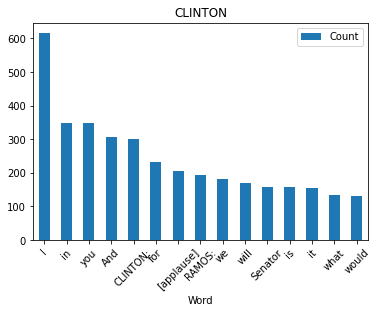

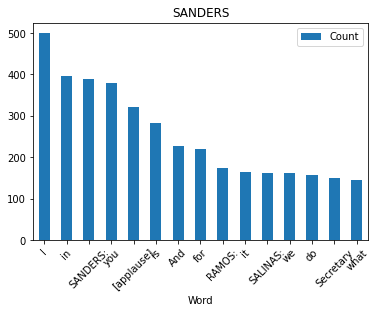

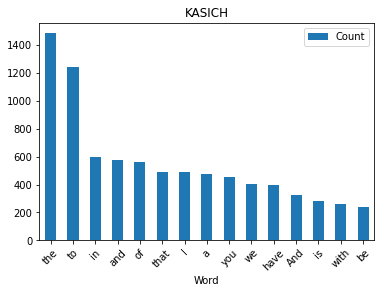

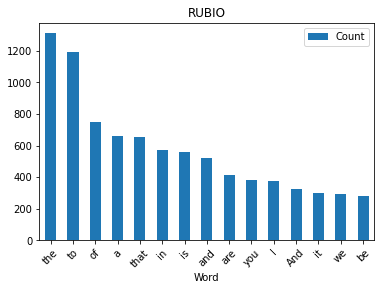

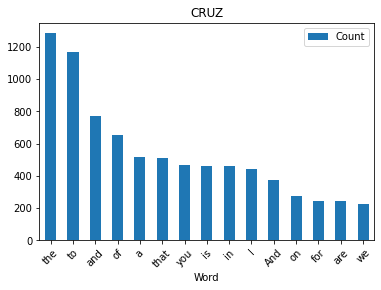

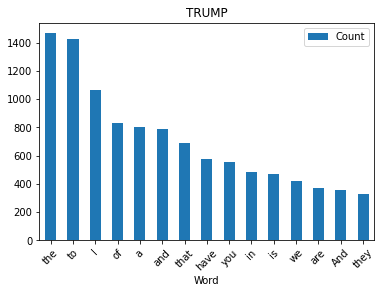

In [187]:
for speaker in ['CLINTON', 'SANDERS', 'KASICH', 'RUBIO', 'CRUZ', 'TRUMP']: # Loops through each speaker
    # Creates a DataFrame (Table) that records how many times a candidate uses each word
    df = pd.DataFrame(speakers[speaker], index=['Count']).T 
    
    # Sorts the dataframe by how many times each word appears
    df.sort_values(by='Count', ascending=False).head(15).index.rename('word', inplace=True)
    tmp_df = df.sort_values(by='Count', ascending=False).head(15)
    tmp_df.index.name = 'Word'
    ax = tmp_df.plot(kind='bar', rot=45)
    ax.set_title(speaker)

<!--
BEGIN QUESTION
name: q4_1
points: 2
-->

**Question 4.1:** Do you see any trends in the figures above? Are there any common types of words that are most frequent across all candidates?

There are couple of cleaning issues that slipped through. The non-candidate speakers names slipped through and got interlaced into the other candidates. There are many stop words still being calculated, and we also didn't look at the legnth of the speeches to see if it was a fair comparison (though there are rules about speaker time, if one member spoke more often, faster, or longer, they would have a larger vocabulary purely as a consequence of quanitity). Going back to the stop words, most of the candidates feature top words that follow Zipf's law.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [188]:
grader.check_all()

q1_1 passed!

q1_2 passed!

q1_3 passed!

q1_4 passed!

q2_1 passed!

q2_2 passed!

q2_3 passed!

q2_4 passed!

q2_5 passed!

q2_6 passed!

q3_2 passed!

q3_3 passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [191]:
# Save your notebook first, then run this cell to export your submission.
grader.export()